## 2.1 Gambler's Ruin

Reference solution: https://www.columbia.edu/~ks20/FE-Notes/4700-07-Notes-GR.pdf 

We can do some simple algebra and use the idea that $P_i - P_{i-1} = \dfrac{q}{p} (P_{i-1} - P_{i-2})$ to show that, when $q\neq p$:
$$
P_i = \dfrac{1- (\dfrac{q}{p})^i }{1-(\dfrac{q}{p})^N}
$$

and when $q=p=\dfrac{1}{2}$:

$$
P_i = \dfrac{i}{N}
$$

where $P_i$ is the probability of reaching state $N$ before reaching state 0 (getting broke) starting with $i$ dollars and $p=(1-q)$ is the probability win 1 dollar (thus move from any state k to k+1). 

Let's compare the numeric estimates with the analytical ones for some values of p, i and N below.

In [97]:
# number of times we get rich should be same as analytical prediction
import numpy as np
eps = 0.0001
def analytical_probability(p,i,N)-> float:
    if 0.5 - eps <= p <= 0.5 + eps:
        return i/N 
    a = (1-p)/p
    return (1- a**i) / (1-a**N)

# random mapping representation
def simulate(p,i,N):
    path = [i]
    while i!=0 and i!=N:
        r = np.random.random()
        if r<=p:
            i+=1
        else:
            i-=1
        path.append(i)
    return int(i == N), path 

In [215]:
repeat = 2000
p = 0.40
i = 1
N = 100
results = [simulate(p,i,N) for _ in range(repeat)]
win_lose, paths = zip(*results)
longest_path = max([len(p) for p in paths])

In [216]:
longest_path

118

In [217]:
#expected value of number of hits to N vs experimental outcome
analytical_probability(p,i,N) * repeat , sum(win_lose)

(2.4596544265798648e-15, 0)

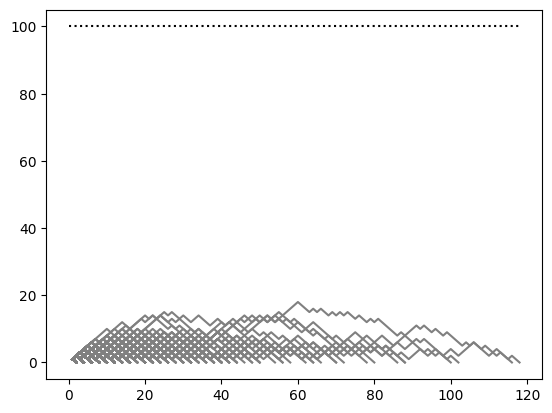

In [218]:
import matplotlib.pyplot as plt
plt.hlines(y=N,xmin=0,xmax=longest_path,linestyles='dotted',colors='black')
for is_win, path in results:
    plt.plot(range(1,len(path)+1),path,c='green' if is_win else "grey")
plt.show()

## 2.2 Coupon Collecting

**Prerequisites**

- Expectation for geometric random variable is $1/p$: https://socratic.org/questions/what-is-the-formula-of-the-expected-value-of-a-geometric-random-variable#534087
- Harmonic series ~ $ln(n)$: https://math.stackexchange.com/a/2203293 

_Proposition 2.4._ 

I didn't understand the last part of the proof. Ask someone about how we can show:

$$
(1-\dfrac{1}{n})^{\lceil nlog n + cn\rceil} \leq exp(-\dfrac{nlogn +cn}{n})
$$

I dont know the exact proof but it turns out that by using taylor expansion we can show:

$$
(1-\dfrac{1}{n})^k \approx e^{- \dfrac{k}{n}}
$$

## 2.3 The Hypercube an the Ehrenfest Urn Model

.